In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


- This dataset contains a target/dependent variable(price column).
- It will actually come under supervised machine learning algorithm.
- K means clustering is an unsupervised machine learning algorithm.

# Data cleaning

In [3]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
data = data.drop('Unnamed: 0', axis =1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [5]:
data = data.rename({'TotalFloor':'Total Floor','Living.Room':'Living Room'},axis = 1)

In [6]:
data.head()

,Sqft,Floor,Total Floor,Bedroom,Living Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


# selecting any two columns to perform K means clustering

In [7]:
x = data[['Sqft','Price']]
x.head()

,Sqft,Price
0,1177.698,62000
1,2134.800,78000
2,1138.560,58000
3,1458.780,45000
4,967.776,45000


# Create numpy array

In [8]:
x = x.iloc[:,:].values
x

array([[ 1177.698, 62000.   ],
       [ 2134.8  , 78000.   ],
       [ 1138.56 , 58000.   ],
       ...,
       [  740.064, 45000.   ],
       [ 1707.84 , 65000.   ],
       [ 1376.946, 36000.   ]])

# Apply K means clustering

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans

KMeans()

In [10]:
kmeans.fit(x)

KMeans()

# Checking the centre values of the cluster

In [11]:
kmeans.cluster_centers_

array([[  1083.37232609,  40630.27717391],
       [  2530.849875  , 134409.90625   ],
       [  1896.87309677,  72811.75268817],
       [  3849.31125   , 210125.        ],
       [  2067.71984   ,  96568.78666667],
       [   801.03688421,  27093.78947368],
       [  1507.25165753,  54002.40410959],
       [  3880.8885    , 170916.66666667]])

# Using elbow method we can find the optimal value of K in clustering.

In [12]:
x

array([[ 1177.698, 62000.   ],
       [ 2134.8  , 78000.   ],
       [ 1138.56 , 58000.   ],
       ...,
       [  740.064, 45000.   ],
       [ 1707.84 , 65000.   ],
       [ 1376.946, 36000.   ]])

In [13]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

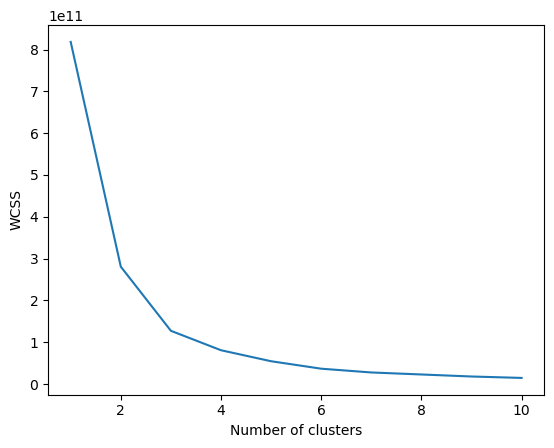

In [14]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

- Here we get K as 3.
- Apply this value to kmeans.

In [15]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [16]:
y_kmeans

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1,

-Visualization.

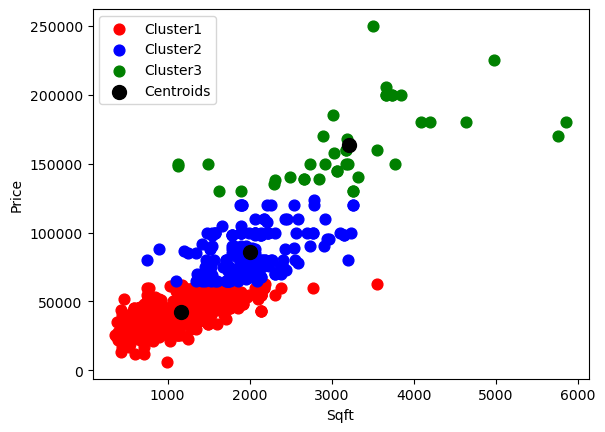

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.legend() 
plt.show()